# CSMODEL
### Project 2 - Group 5
Members:
- Alon-alon, Jason Miguel E.
- Escalona, Jose Miguel A.
- Llorca, Marcelino Francis S.

### 1. Dataset Representation

The dataset that was chosen for this project was ***Dataset3.csv***. At first glance, the modelling method that seems to be possible to use is associative rule mining, based specifically on the raw structure of the data. But upon deeper inspection, it revealed that it may not be applicable to associative rule mining due to one key characteristic: the value is has a limited range of 1 to 5. This makes it more of a rating value rather than an indication of quantities of certain item types. Therefore, applying the idea of associative rule mining won't be of any use on the dataset since it does not make sense to limit the quantity of items/words that a customer/document must have on every go. 

Therefore, **the appropriate data modelling technique that must be applied on Dataset3 must be the recommender systems**, specifically the collaborative filtering approach.

The resulting DataFrame from Dataset3 has **300 columns and 100 rows** which by default is named as 0 to n. It could be noticed as well in the code that a column called *Unnamed: 0* has been removed that column implies the index values of the dataset when viewed in a spreadsheet application such as Microsoft Excel.

The rows represents a movie while the columns represent the users' rating of movie. **Effectively, the context of the project is that each observation the DataFrame contain the ratings (1-5) of 300 users of a specific movie/tv show.**

In [18]:
import pip
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

main_df = pd.read_csv('Dataset3.csv') #Dataset3 as chosen by the group
main_df.drop(columns='Unnamed: 0', inplace=True) #Dropping the first column which is named as 'Unnamed: 0'
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 300 entries, 0 to 299
dtypes: float64(300)
memory usage: 234.5 KB


The code below confirms the **minimum and max values of the dataset being from 1-5.**

In [19]:
print('Rating Value Range For User 0:\n',main_df.value_counts(subset=['0']).sort_index())
print('\nMin={:.0f} and Max={:.0f}'.format(main_df.min().min(),main_df.max().max()))

Rating Value Range For User 0:
 0  
1.0    20
2.0    18
3.0    11
4.0    10
5.0    21
dtype: int64

Min=1 and Max=5


For easy representation, an external dataset was used to serve as the index values of the DataFrame. **The movie data was sourced from Devesh Kumar Rai's dataset in Kaggle. The dataset contains the titles of movies and its respective ratings from IMDB and Metascore as well as the number of votes of said movie/tv show.**

The data preprocessing for this will be by sorting by IMDB rating afterwhich the resulting form of list will be used as a list for the indices of the *main_df*. The movie dataset was also cleaned prior to sorting since there are duplicates in the said data.

Another column will also be created (*movie_year*) to combine the names and year into one column for easy reference when searching.

Source: https://www.kaggle.com/raidevesh05/movie-ratings-dataset

In [20]:
movie_df = pd.read_csv('movie_ratings.csv')
movie_df.drop(columns='Unnamed: 0', inplace=True)
movie_df.drop_duplicates(subset='movie',inplace=True)
movie_df.sort_values(by='imdb',inplace=True,ascending=False)
movie_df['movie_year'] = movie_df.movie.map(str) +' ('+movie_df.year.map(str)+')' #https://stackoverflow.com/a/11858532
movie_df.drop(columns='metascore', inplace=True)
movie_df

,movie,year,imdb,votes,movie_year
1100,Game of Thrones,2011,9.5,1410281,Game of Thrones (2011)
801,Breaking Bad,2008,9.5,1159103,Breaking Bad (2008)
113,Band of Brothers,2001,9.5,307747,Band of Brothers (2001)
647,Planet Earth,2006,9.4,142671,Planet Earth (2006)
218,The Wire,2002,9.3,238822,The Wire (2002)
...,...,...,...,...,...
845,The Happening,2008,5.0,184319,The Happening (2008)
1147,The Twilight Saga: Breaking Dawn - Part 1,2011,4.9,205429,The Twilight Saga: Breaking Dawn - Part 1 (2011)
349,Charlie's Angels: Full Throttle,2003,4.9,111449,Charlie's Angels: Full Throttle (2003)
925,The Twilight Saga: New Moon,2009,4.7,245496,The Twilight Saga: New Moon (2009)


In [21]:
itemList = movie_df['movie_year'].to_list()
itemList = itemList[0:100] #limiting to row size
main_df.index = itemList
main_df['votes'] = main_df.count(axis=1).to_list()
main_df['imdb'] = movie_df['imdb'].iloc[0:100].to_list() #adjusts it to 1-5
print(main_df.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Game of Thrones (2011) to American Horror Story (2011)
Columns: 302 entries, 0 to imdb
dtypes: float64(301), int64(1)
memory usage: 236.7+ KB
None


In [22]:
#Resulting dataframe to be used for analysis
main_df

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,votes,imdb
Game of Thrones (2011),1.0,5.0,4.0,NaN,1.0,3.0,4.0,1.0,5.0,NaN,...,NaN,2.0,NaN,1.0,4.0,5.0,3.0,4.0,241,9.5
Breaking Bad (2008),NaN,NaN,5.0,3.0,4.0,1.0,4.0,NaN,NaN,1.0,...,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,243,9.5
Band of Brothers (2001),2.0,4.0,1.0,NaN,NaN,4.0,3.0,NaN,4.0,4.0,...,4.0,NaN,3.0,2.0,4.0,5.0,1.0,4.0,247,9.5
Planet Earth (2006),3.0,5.0,1.0,5.0,1.0,3.0,5.0,3.0,2.0,4.0,...,2.0,2.0,5.0,4.0,NaN,NaN,3.0,NaN,252,9.4
The Wire (2002),NaN,NaN,5.0,3.0,2.0,1.0,4.0,NaN,4.0,1.0,...,1.0,2.0,2.0,2.0,1.0,2.0,NaN,5.0,245,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Help (2011),1.0,5.0,5.0,2.0,NaN,NaN,3.0,2.0,4.0,5.0,...,NaN,5.0,NaN,2.0,5.0,4.0,3.0,4.0,240,8.1
Amores perros (2000),3.0,4.0,NaN,3.0,NaN,3.0,NaN,1.0,3.0,2.0,...,1.0,4.0,5.0,5.0,3.0,2.0,4.0,NaN,251,8.1
Donnie Darko (2001),2.0,2.0,2.0,NaN,4.0,1.0,1.0,4.0,5.0,3.0,...,5.0,2.0,5.0,4.0,2.0,NaN,4.0,4.0,237,8.1
Before Sunset (2004),1.0,5.0,NaN,NaN,1.0,5.0,5.0,4.0,4.0,NaN,...,5.0,4.0,NaN,3.0,3.0,5.0,3.0,2.0,244,8.1


It was determined that the rating system used by **IMDB is the 1-10 rating format** while the **dataset is at a 1-5 rating format.**

### 2. Exploratory Data Analysis

**1. What is the average rating and the modal rating that most people give on any movie/tv show? Which movies/tv shows have an average rating equal or beyond the overall average rating?**

In order to determine the overall average rating, the mean on every movie was determined (named as *mean_rating* column) afterwhich the mean_rating column's mean will be used as the overall average rating.

Overall Mean Rating Value: 2.99
Mode Values:
4.0    25
1.0    24
2.0    23
3.0    19
5.0     9
Name: mode_rating, dtype: int64


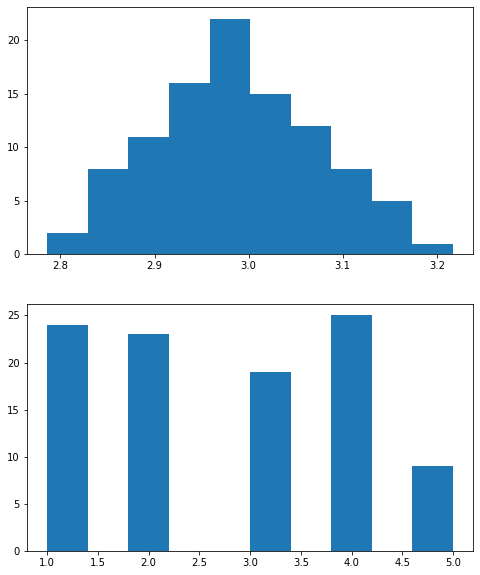

In [23]:
vis_df = pd.DataFrame()
trimmed_main = main_df.iloc[:,0:300] #limiting range to 0-299
vis_df['mean_rating'] = trimmed_main.mean(axis=1) #Average rating on every movie
vis_df['mode_rating'] = trimmed_main.mode(numeric_only=True,axis=1).iloc[0:100,0] #mode of ratings per movie
overall_mean = vis_df['mean_rating'].mean()
print('Overall Mean Rating Value: {:.2f}'.format(overall_mean)) #Average of mean_rating column in main_df
print('Mode Values:')
print(vis_df['mode_rating'].value_counts())
fig, subplt = plt.subplots(2, figsize=(8,10))
subplt[0].hist(vis_df['mean_rating'].to_list())
subplt[1].hist(vis_df['mode_rating'].to_list())
plt.show()

In [24]:
print('First 10 movies/TV shows that have the highest mean_rating')
vis_df = vis_df[vis_df['mean_rating'] >= overall_mean].sort_values(by='mean_rating', ascending=False)
vis_df.iloc[0:10]

First 10 movies/TV shows that have the highest mean_rating


,mean_rating,mode_rating
Sons of Anarchy (2008),3.217213,3.0
The Intouchables (2011),3.160000,4.0
It's Always Sunny in Philadelphia (2005),3.157895,5.0
Mindhunter (2017),3.155378,4.0
Snatch (2000),3.142857,3.0
The Wolf of Wall Street (2013),3.132296,5.0
Batman Begins (2005),3.125475,4.0
The Help (2011),3.112500,4.0
Sherlock (2010),3.104247,2.0
Inside Out (2015),3.103586,5.0


**While the movies/TV shows show that the mean rating is at ~3, the mode is somewhat spread on values 1-4 on a per movie basis.**

**2. How spread out are the ratings that were given?**

For the second exploratory data analysis question, we want to find out how spread out the ratings of the users are, or how frequent a rating was given (1, 2 ,3, 4 or 5). This would help show if users tended to vote on the higher side (closer to 5) or the lower side (closer to 1).

In [25]:
eda2_df = main_df.loc[:, '0':'299']
eda2_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Game of Thrones (2011),1.0,5.0,4.0,NaN,1.0,3.0,4.0,1.0,5.0,NaN,...,3.0,5.0,NaN,2.0,NaN,1.0,4.0,5.0,3.0,4.0
Breaking Bad (2008),NaN,NaN,5.0,3.0,4.0,1.0,4.0,NaN,NaN,1.0,...,5.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0
Band of Brothers (2001),2.0,4.0,1.0,NaN,NaN,4.0,3.0,NaN,4.0,4.0,...,3.0,2.0,4.0,NaN,3.0,2.0,4.0,5.0,1.0,4.0
Planet Earth (2006),3.0,5.0,1.0,5.0,1.0,3.0,5.0,3.0,2.0,4.0,...,1.0,2.0,2.0,2.0,5.0,4.0,NaN,NaN,3.0,NaN
The Wire (2002),NaN,NaN,5.0,3.0,2.0,1.0,4.0,NaN,4.0,1.0,...,3.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Help (2011),1.0,5.0,5.0,2.0,NaN,NaN,3.0,2.0,4.0,5.0,...,4.0,1.0,NaN,5.0,NaN,2.0,5.0,4.0,3.0,4.0
Amores perros (2000),3.0,4.0,NaN,3.0,NaN,3.0,NaN,1.0,3.0,2.0,...,4.0,3.0,1.0,4.0,5.0,5.0,3.0,2.0,4.0,NaN
Donnie Darko (2001),2.0,2.0,2.0,NaN,4.0,1.0,1.0,4.0,5.0,3.0,...,4.0,4.0,5.0,2.0,5.0,4.0,2.0,NaN,4.0,4.0
Before Sunset (2004),1.0,5.0,NaN,NaN,1.0,5.0,5.0,4.0,4.0,NaN,...,3.0,2.0,5.0,4.0,NaN,3.0,3.0,5.0,3.0,2.0


In [26]:
eda2_df.apply(pd.value_counts)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1.0,20,17,18,14,16,12,14,16,13,18,...,17,19,18,17,17,18,16,21,19,16
2.0,18,15,16,15,15,18,15,17,13,19,...,14,22,12,23,22,18,19,12,15,12
3.0,11,16,21,18,14,26,16,19,15,17,...,22,11,12,10,12,14,23,15,16,12
4.0,10,22,18,18,20,12,23,14,28,17,...,22,14,19,21,20,19,11,15,20,19
5.0,21,14,14,18,13,19,17,18,17,17,...,13,15,24,19,14,12,14,22,13,15


1.0    5055
2.0    5056
3.0    5043
4.0    5042
5.0    4904
dtype: int64


<AxesSubplot:>

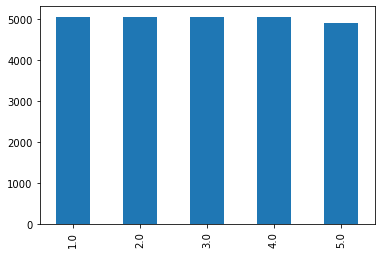

In [27]:
rating_frequencies = eda2_df.apply(pd.value_counts).sum(axis=1)
print(rating_frequencies)
rating_frequencies.plot.bar()

This suggests that **the ratings given by users, regardless of the movie/TV show, is well distributed and spread**, implying that the ratings don't lean only at a specific value.

### 3. Data Mining

**INSTRUCTIONS FOR COLLABORATIVE FILTERING**
- Use the collaborative_filtering.py file from our exercises. Make sure that your code is working properly. Set k to 5.
- Perform collaborative filtering.
- Answer the question: Give the top 5 items that are most similar to the item at index 0.

In [28]:
from Collab import CollaborativeFiltering
k = 5
miner = CollaborativeFiltering(k)
print('Miner_Collab k value:', k)

Miner_Collab k value: 5


**From specification (Data Mining):**<br>
Answer the question: Give the top 5 items that are most similar to the item at index 0.

The *itemList* is synchronous to the indices of the DataFrame thus the list's 0th index is also the DF's 0th index. 

In [29]:
filter_df = main_df.iloc[:,0:300]
item = filter_df.loc[itemList[0], :]
drop_item = filter_df.drop(itemList[0])
similar_items = miner.get_k_similar(drop_item, item)
print('Item: {:}\n========================================\nSimilar Items:\n{:}\n========================================'.format(itemList[0],similar_items[1].nlargest(5).round(4)))

Item: Game of Thrones (2011)
Similar Items:
The Punisher (2017)        0.1499
Mindhunter (2017)          0.1254
The Walking Dead (2010)    0.1166
Modern Family (2009)       0.1158
Stranger Things (2016)     0.1028
dtype: float64


### 4. Insights and Conclusions

The result shows that a user that watched Game of Thrones (2011 will have: The Punisher (2017), Mindhunter (2017), The Walking Dead (2010), Modern Family (2009), and Stranger Things (2016) as their top recommendation. However it is well noted that these scores are no more than 20% confidence levels.

With this, the group determined what aspects of the movie may have contributed to the similarities of these films.

Finding what 'features' are similar to the input and recommended movies/tv shows.

**The features that will be searched for IMDB ratings, genres, actors (five leading actors), production studio, and format (TV/Movie).**

**1. IMDB Ratings and its equivalent ratings by users**

In [30]:
#Finding commonlaties amongst its ratings
combined_list = [itemList[0]] + similar_items[0]
filtered_main = pd.DataFrame([main_df[main_df.index.isin(combined_list)].count(axis=1),main_df[main_df.index.isin(combined_list)].mean(axis=1)])
filtered_main = filtered_main.transpose()
filtered_main.columns = ['votes','user_rating']
filtered_movie = movie_df[movie_df['movie_year'].isin(combined_list)]
filtered_main = filtered_main.sort_values(by='user_rating', ascending=False)
filtered_movie = filtered_movie.sort_values(by='imdb', ascending=False)
print('Mean Rating from Users:\n{:}\n{:}'.format(filtered_main,'========================================'))
print('Ratings From IMDB:\n',filtered_movie[{'movie_year','imdb','votes'}],'\n========================================')

Mean Rating from Users:
                         votes  user_rating
Mindhunter (2017)        253.0     4.156126
Stranger Things (2016)   256.0     4.054297
Modern Family (2009)     261.0     4.005364
The Walking Dead (2010)  247.0     3.997166
Game of Thrones (2011)   243.0     3.989712
The Punisher (2017)      259.0     3.840154
Ratings From IMDB:
                    movie_year    votes  imdb
1100   Game of Thrones (2011)  1410281   9.5
1602   Stranger Things (2016)   559626   8.9
1738      The Punisher (2017)   135366   8.6
1746        Mindhunter (2017)   111213   8.5
916      Modern Family (2009)   306167   8.4
1002  The Walking Dead (2010)   771362   8.3 


It could be noticed that **the ratings for Game of Thrones and the recommendations are on the upper part of the rating spectrum for both the users as well as IMDB.**

**2. Show Genres (according to IMDB)**

Formatting:
- **Common to Game of Thrones**<br>
- *Common only amongst recommendations*<br>
- ***Common for both Game of Thrones and recommendations***

1. Game of Thrones (2011): **Action**, Adventure, **Drama**, **Fantasy**
2. The Punisher (2017): **Action**, *Crime*, ***Drama***, *Thriller*
3. Mindhunter (2017): *Crime*, ***Drama***, *Thriller*
4. The Walking Dead (2010): ***Drama***, *Horror*, *Thriller*
5. Modern Family (2009): Comedy, ***Drama***, Romance
6. Stranger Things (2016): ***Drama***, ***Fantasy***, *Horror*, Mystery, Sci-Fi, *Thriller*

From here, it could be determined that the common genres between Game of Thrones and the recommendations are **Action, Drama, Fantasy.**

**3. Five of its Leading Actors (according to and as sorted by IMDB)**

Formatting:
- **Common to Game of Thrones**<br>
- *Common only amongst recommendations*<br>
- ***Common for both Game of Thrones and recommendations***

1. Game of Thrones (2011): Peter Dinklage, Lena Headey, Emilia Clarke, Kit Harington, Sophie Turner
2. The Punisher (2017): Jon Bernthal, Amber Rose Revah, Ben Barnes, Jason R. Moore, Ebon Moss-Bachrach
3. Mindhunter (2017): Jonathan Groff, Holt McCallany, Anna Torv, Sonny Valicenti, Stacey Roca
4. The Walking Dead (2010): Norman Reedus, Melissa McBride, Lauren Cohan, Josh McDermitt, Christian Serratos
5. Modern Family (2009): Ed O'Neill, Sofia Vergara, Julie Bowen, Ty Burrell, Jesse Tyler Ferguson
6. Stranger Things (2016): Winona Ryder, David Harbour, Finn Wolfhard, Millie Bobby Brown, Gaten Matarazzo

**No commonalities have been found for the actors and actresses** that take part as a lead role on all movies/tv shows listed.

**4. Production Studio**

Formatting:
- **Common to Game of Thrones**<br>
- *Common only amongst recommendations*<br>
- ***Common for both Game of Thrones and recommendations***

1. Game of Thrones (2011): Home Box Office (HBO), Television 360, Grok! Studio (as Grok! Television), Generator Entertainment, Bighead Littlehead
2. The Punisher (2017): ABC Signature, Disney-ABC Domestic Television, Marvel Entertainment, Marvel Television, *Netflix*, Walt Disney Television
3. Mindhunter (2017): Denver and Delilah Productions, *Netflix*, Panic Pictures (II)
4. The Walking Dead (2010): American Movie Classics (AMC) (presents), Circle of Confusion, Valhalla Motion Pictures (as Valhalla Entertainment), Darkwoods Productions, AMC Studios, Idiot Box Productions
5. Modern Family (2009): Levitan / Lloyd (seasons 1-3), 20th Century Fox Television, Steven Levitan Productions (season 4), Picador Productions (season 4)
6. Stranger Things (2016): 21 Laps Entertainment, Monkey Massacre, *Netflix*

**No common production studio was found between Game of Thrones and its recommendations**, however there are **some commonalities among some of the recommendations over Netflix as a production studio.**

**5. Format**

Formatting:
- **Common to Game of Thrones**<br>
- *Common only amongst recommendations*<br>
- ***Common for both Game of Thrones and recommendations***

1. Game of Thrones (2011): ***TV Series***
2. The Punisher (2017): ***TV Series***
3. Mindhunter (2017): ***TV Series***
4. The Walking Dead (2010): ***TV Series***
5. Modern Family (2009): ***TV Series***
6. Stranger Things (2016): ***TV Series***

**It was determined that all of the recommendations turned out to be TV Series as well**, which is the same to Game of Thrones' format.

**Conclusion**<br>

Based on an **Item-Item Collaborative Filtering at k=5**, the TV show that is **most similar to Game of Thrones (0th index) in terms of ratings is The Punisher, as it had the greatest similarity score (14.99%). This means that if a user had already watched The Punisher and had given it a positive rating, they will most likely enjoy watching Game of Thrones and vice-versa. Taking a look further, users who have liked Game of Thrones may also most likely enjoy the other Top 5 shows that are most similar with it, however, since The Punisher had the greatest similarity score, it may be assumed that a user who enjoyed Game of Thrones may not enjoy Mindhunter, The Walking Dead, Modern Family, or Stranger Things, as much as The Punisher.**

Despite the findings the group has made through Collaborative Filtering with the dataset, there may be some discrepancy when comparing it to real world data retrieved from IMDB. If we compare the two, we could see that the **most similar features among the Top 5 most similar shows to Game of Thrones, according to Collaborative Filtering, are Format and Show Genres. There are little to no similarities between the shows' leading actors and production studios. However, the most significant feature to look at are the actual ratings of the six shows (including Game of Thrones).** It could be assumed that **if there were more similarities amonst the shows' attributes and its respective ratings, then the similarity values should increase accordingly.**

Based on the data collected from IMDB, **Game of Thrones is the most highly rated show among the six, with a rating of 9.5, while it is only 5th to the highest rated show based on the average user ratings, the first being Mindhunter.** Furthermore, the rating systems for both the given dataset and IMDB is different (1-5 for the dataset and 1-10 for IMDB), implying their innate differences. Because of this, **the group has concluded that the ratings of Dataset3.csv which were mapped to the external dataset from Kaggle (which was sourced from IMDB) are inconsistent with real world data.**